In [1]:
# -*- coding:utf-8 -*-
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
"""
实验目的：特征降维实验

数据集：本程序使用Iris数据集是常用的分类实验数据集，由Fisher, 1936收集整理。
Iris也称鸢尾花卉数据集，是一类多重变量分析的数据集。
数据集包含150个数据，分为3类，每类50个数据，每个数据包含4个属性。
可通过花萼长度，花萼宽度，花瓣长度，花瓣宽度4个属性预测鸢尾花卉属于
（Setosa，Versicolour，Virginica）三个种类中的哪一类。
"""

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

In [3]:
"""
PCA函数说明：
	class sklearn.decomposition.PCA(n_components=None, copy=True, whiten=False, 
					svd_solver=’auto’, tol=0.0, iterated_power=’auto’, random_state=None)
 
参数说明：
http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
注意：PCA是无监督的降维方法

LDA函数说明：
	class sklearn.lda.LDA(solver='svd', shrinkage=None, priors=None, n_components=None, 
					store_covariance=False, tol=0.0001)[source]
 
参数说明：
http://scikit-learn.org/0.16/modules/generated/sklearn.lda.LDA.html
注意：LDA是有监督的降维方法
"""

# 构造并优化PCA降维模型，投影到二维平面坐标系
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

# 构造并优化LDA降维模型，投影到二维平面坐标系
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))


explained variance ratio (first two components): [0.92461621 0.05301557]


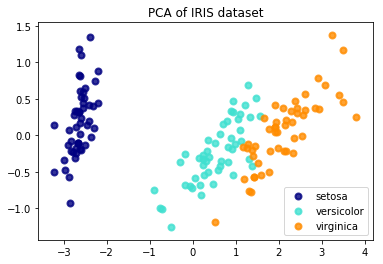

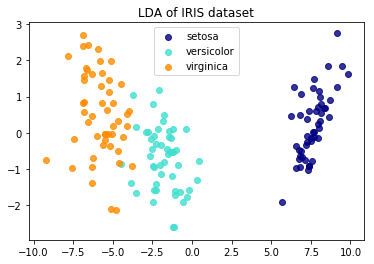

In [4]:
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of IRIS dataset')

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()